In [8]:
%matplotlib inline
from mxnet import autograd, np, npx
from d2l import mxnet as d2l
npx.set_np()
import mxnet as mx
from matplotlib import pyplot as plt
%matplotlib inline


# ReLU

ReLU(x) = max(x, 0)
ReLU = Rectifies Linear Unit - a simple non linear transformation. The function retains the positive values and transforms all
negative values to zero.
When the input is negative, the derivative of the ReLU function is 0, and when the input is positive,
the derivative of the ReLU function is 1. Note that the ReLU function is not differentiable when the
input takes value precisely equal to 0. In these cases, we default to the left-hand-side derivative
and say that the derivative is 0 when the input is 0.

(200,)


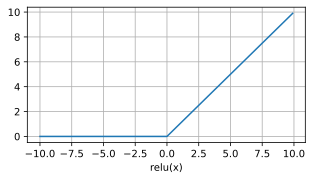

In [9]:
x = np.arange(-10.0, 10.0, 0.1)
x.attach_grad()
print(x.shape)
with autograd.record():
    y = npx.relu(x)
d2l.plot(x, y, 'relu(x)', figsize = (5, 2.5))

As per the paper the ReLU help in better optimization and helps in vanishing gradients.there are many variants 
to the ReLU function, including the parameterized ReLU (pReLU), Leaky ReLU and ELU.

The derivative of Relu function plotted below:

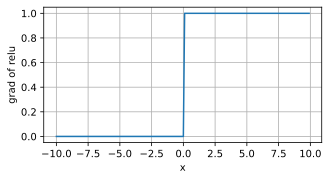

In [3]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of relu', figsize = (5,2.5))
# ReLU activation

In [4]:
import numpy as np
def visualize_activation(activation_fn):
    data = np.linspace(-10, 10, 501)
    x1 = mx.np.array(data)
    x1.attach_grad()
    with mx.autograd.record():
        y1 = activation_fn(x1)
    y1.backward()

    plt.figure()
    plt.plot(data, y1.asnumpy())
    plt.plot(data, x1.grad.asnumpy())
    activation = activation_fn.__class__.__name__[:-1]
    plt.legend(["{} activation".format(activation), "{} gradient".format(activation)])

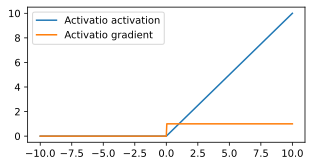

In [5]:
visualize_activation(mx.gluon.nn.Activation('relu'))

# Leaky ReLU
Leaky ReLUs are a variant of ReLU that multiply the input by a small positive parameter  𝛼  when the value is negative. Unlike the ReLU which sets the activation and gradient for negative values to zero, the LeakyReLU allows a small gradient. The equation for the LeakyReLU is:

𝐿𝑒𝑎𝑘𝑦𝑅𝑒𝐿𝑈(𝛼,𝑥)={𝑥,𝛼𝑥,if 𝑥≥0}  otherwise  
where  𝛼>0  is small positive number. 

(200,)


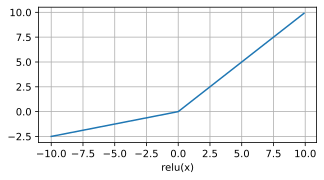

In [10]:
x = np.arange(-10.0, 10.0, 0.1)
x.attach_grad()
print(x.shape)
with autograd.record():
    y = npx.leaky_relu(x)
d2l.plot(x, y, 'relu(x)', figsize = (5, 2.5))

So the difference between ReLU and Leaky Relu is that Leaky ReLU allows a small gradient for the negative values
where as for ReLU the gradient for negative is zero

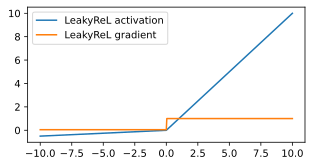

In [11]:
# Leaky ReLU with 𝛼 = 0.05
visualize_activation(mx.gluon.nn.LeakyReLU(0.05))

# pReLU

The PReLU activation function, or Parametric Leaky ReLU introduced by He et al, is a version of LeakyReLU that learns the parameter  𝛼  during training. An initialization parameter is passed into the PreLU activation layer and this is treated as a learnable parameter that is updated via gradient descent during training. 
This is in contrast to LeakyReLU where  𝛼  is a hyperparameter.

pReLU(x) = max(0, x) + α min(0, x).

# Sigmoid Function

The sigmoid function transforms its inputs, for which values lie in the domain R, to outputs that lie
on the interval (0, 1). For that reason, the sigmoid is often called a squashing function: it squashes
any input in the range (-inf, inf ) to some value in the range (0, 1):

sigmoid(x) = 1/ (1 + exp(−x))

The derivative of the sigmoid function is given by the following equation:
    
d/dx sigmoid(x) = exp(−x)/(1 + exp(−x))2 = sigmoid(x) (1 − sigmoid(x))

The derivative of the sigmoid function is plotted below. Note that when the input is 0, the derivative of the sigmoid function reaches a maximum of 0.25. As the input diverges from 0 in either
direction, the derivative approaches 0.

The Derivative is plotted below:

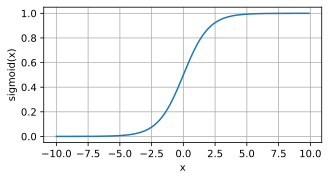

In [12]:
with autograd.record():
     y = npx.sigmoid(x)
d2l.plot(x, y, 'x', 'sigmoid(x)', figsize=(5, 2.5))

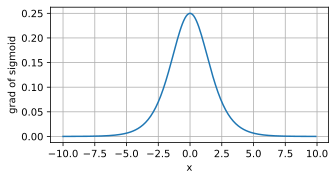

In [13]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

# Tanh Function
Like the sigmoid function, the tanh (hyperbolic tangent) function also squashes its inputs, 
transforming them into elements on the interval between -1 and 1:
tanh(x) = 1 − exp(−2x)/1 + exp(−2x).

 Note that as the input nears 0, the tanh function approaches a linear transformation. Although the shape of the function is similar to that of the sigmoid function,
the tanh function exhibits point symmetry about the origin of the coordinate system.

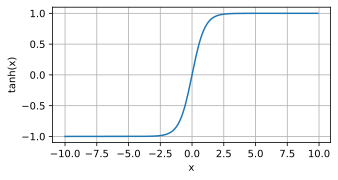

In [14]:
with autograd.record():
    y = np.tanh(x)
d2l.plot(x, y, 'x', 'tanh(x)', figsize=(5, 2.5))

The derivative of the tanh function is:
d/dx tanh(x) = 1 − square(tanh)(x).
The derivative of tanh function is plotted below. As the input nears 0, the derivative of the tanh
function approaches a maximum of 1. And as we saw with the sigmoid function, as the input
moves away from 0 in either direction, the derivative of the tanh function approaches 0.

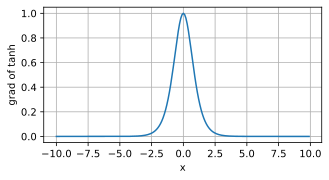

In [15]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

# Summary
MLP adds one or multiple fully-connected hidden layers between the output and input layers
  and transforms the output of the hidden layer via an activation function.

Commonly-used activation functions include the ReLU function, the sigmoid function, and
  the tanh function.